In [1]:
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk

In [2]:
latin_stopwords = ["a", "ab", "ac", "ad", "adhic ", "aliqui", "aliquis", 
           "an", "ante", "apud", "at", "atque", "aut", "autem", 
           "cum", "cur", "de", "deinde", "dum", "ego", "enim", 
           "ergo", "es", "est", "et", "etiam", "etsi", "ex", 
           "fio", "haud", "hic", "iam", "idem", "igitur", "ille", 
           "in", "infra", "inter", "interim", "ipse", "is", "ita",
           "magis", "modo", "mox", "nam", "ne", "nec", "necque", 
           "neque", "nisi", "non", "nos", "o", "ob", "per", "possum", 
           "post", "pro", "quae", "quam", "quare", "qui", "quia", 
           "quicumque", "quidem", "quilibet", "quis", "quisnam", 
           "quisquam", "quisque", "quisquis", "quo", "quoniam", 
           "sed", "si", "sic", "sive", "sub", "sui", "sum", 
           "super", "suus", "tam", "tamen", "trans", "tu", 
           "tum", "ubi", "uel", "uero"]

In [3]:
def remove_digits(input_document):

    # CountVectorizer operates on entire document
    tokens = nltk.word_tokenize(input_document)
    tmp_text=list()

    # for each word
    for word in tokens:
        # takes care of one character non-alpha words
        if len(word) == 1 :
            if word.isalpha() == True:
                tmp_text.append(word)
        else:
            # else append only if not a digit
            # check for periods and commas
            word = word.replace('.','')
            word = word.replace(',','')
            if word.isdigit() == False:
                tmp_text.append(word)
                
    output_object = ' '.join(tmp_text)
    return output_object

In [4]:
texts=["AugustineLatinChapter/1",
       "AugustineLatinChapter/2",
       "AugustineLatinChapter/3",
       "AugustineLatinChapter/4",
       "AugustineLatinChapter/5",
       "AugustineLatinChapter/6",
       "AugustineLatinChapter/7",
       "AugustineLatinChapter/8", 
       "AugustineLatinChapter/9", 
       "AugustineLatinChapter/10", 
       "AugustineLatinChapter/11", 
       "AugustineLatinChapter/12",
       "AugustineLatinChapter/13"]

# Piper used sparsity of .4  = 60% of documents
df_factor = int(np.round((len(texts)*.6),0))

vectorizer = CountVectorizer(input='filename',stop_words=latin_stopwords,
                             strip_accents='unicode',lowercase=True,
                             preprocessor=remove_digits,
                             min_df=df_factor)

dtm_matrix = vectorizer.fit_transform(texts)

In [5]:
# tell us about the model
documents, vocabulary = dtm_matrix.shape
print("Documents:",documents)
print("Vocabulary:",vocabulary)

Documents: 13
Vocabulary: 479


In [6]:
# calculate cosine similarity distances between each text
cosine_dist_matrix = 1 - cosine_similarity(dtm_matrix.toarray())

In [7]:
# display distance from the first text
from operator import itemgetter
for x,y in sorted(enumerate(np.round(cosine_dist_matrix[0],3)), key=itemgetter(1)):
    print("{0:.3f} {1}".format(y, texts[x]))

0.000 AugustineLatinChapter/1
0.133 AugustineLatinChapter/4
0.138 AugustineLatinChapter/2
0.147 AugustineLatinChapter/10
0.151 AugustineLatinChapter/5
0.185 AugustineLatinChapter/8
0.186 AugustineLatinChapter/9
0.200 AugustineLatinChapter/3
0.241 AugustineLatinChapter/7
0.242 AugustineLatinChapter/6
0.270 AugustineLatinChapter/13
0.322 AugustineLatinChapter/12
0.356 AugustineLatinChapter/11


In [8]:
# reduce using MDS
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(cosine_dist_matrix)

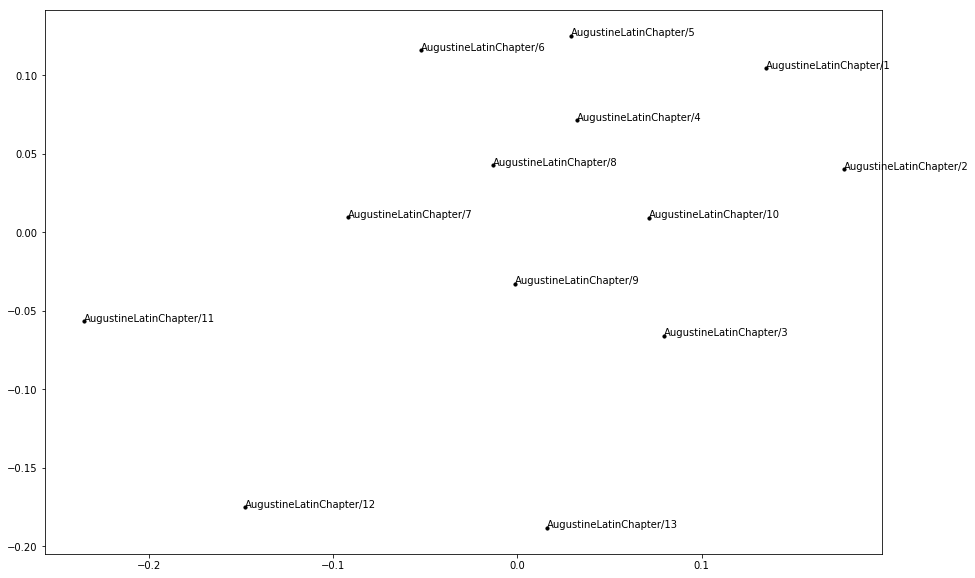

In [10]:
# plot!
import matplotlib.pyplot as plt
xs, ys = pos[:, 0], pos[:, 1]
fig = plt.figure(figsize=(15, 10),)

for x, y, text in zip(xs, ys, texts):
    plt.scatter(x, y, c='black',s=10)
    plt.text(x, y, text)
plt.show()